# Plot patterns for schematic

In [1]:
import os
from pathlib import Path
import numpy as np
import scipy.spatial.distance as sd
from sklearn.decomposition import FastICA
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from mindstorm import dsmplot
from bender_study import rsa

res_dir = Path(os.environ['BENDER_RESULTS'])
fig_dir = Path(os.environ['BENDER_FIGURES']) / 'schematic'

model_file = res_dir / 'batch' / 'semantics' / 'wiki_w2v.npz'

In [2]:
groups = pd.DataFrame(
    {
        'A': ['Julia Roberts', 'Barack Obama', 'Yosemite', 'Eiffel Tower'],
        'B': ['apple', 'umbrella', 'tea kettle', 'leaf'],
        'C': ['scissors', 'cup', 'butterfly', 'picnic basket'],
    }, index=[1, 2, 3, 4]
)
groups

,A,B,C
1,Julia Roberts,apple,scissors
2,Barack Obama,umbrella,cup
3,Yosemite,tea kettle,butterfly
4,Eiffel Tower,leaf,picnic basket


In [3]:
rng = np.random.default_rng(42)

## Pre-exposure and study patterns

In [4]:
model = np.load(model_file)
ica = FastICA(n_components=25, random_state=42)
simple = {
    'items': model['items'].copy(),
    'vectors': np.clip(stats.zscore(ica.fit_transform(model['vectors']), axis=0), -1, 1),
}

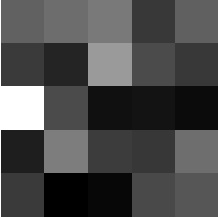

In [5]:
dsmplot.plot_pattern(
    rsa.get_item_vectors(groups.at[1, 'A'], simple).reshape(5, 5)
);
plt.savefig(fig_dir / 'item_pattern1.png')

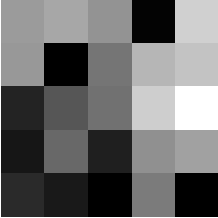

In [6]:
dsmplot.plot_pattern(
    rsa.get_item_vectors(groups.at[2, 'A'], simple).reshape(5, 5)
);
plt.savefig(fig_dir / 'item_pattern2.png')

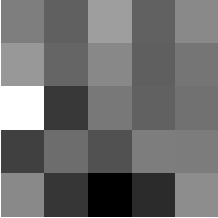

In [7]:
dsmplot.plot_pattern(
    rsa.get_item_vectors(['Jennifer Aniston'], simple).reshape(5, 5)
);
plt.savefig(fig_dir / 'item_pattern3.png')

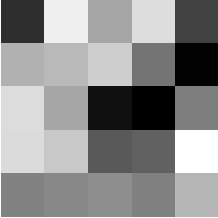

In [8]:
dsmplot.plot_pattern(
    np.sum(
        rsa.get_item_vectors(groups.loc[1].to_list(), simple), 0
    ).reshape(5, 5)
)
plt.savefig(fig_dir / 'encoding_pattern1.png')

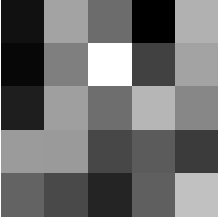

In [9]:
dsmplot.plot_pattern(
    np.sum(
        rsa.get_item_vectors(groups.loc[3].to_list(), simple), 0
    ).reshape(5, 5)
)
plt.savefig(fig_dir / 'encoding_pattern2.png')

## Study representational dissimilarity matrices

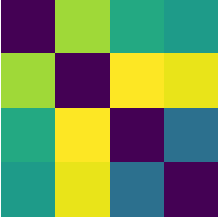

In [10]:
encoding_patterns = np.array(
    [
        np.sum(
            rsa.get_item_vectors(groups.loc[i].to_list(), model), 0
        ) for i in range(1, 5)
    ]
)
encoding_patterns += rng.normal(size=encoding_patterns.shape)
fig, ax = plt.subplots()
ax.matshow(sd.squareform(sd.pdist(encoding_patterns, 'correlation')))
ax.set_axis_off()
fig.savefig(fig_dir / 'rdm_neural.png', pad_inches=0)

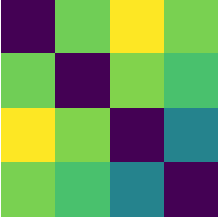

In [11]:
a_vectors = rsa.get_item_vectors(groups['A'].to_list(), model)
fig, ax = plt.subplots()
ax.matshow(sd.squareform(sd.pdist(a_vectors, 'correlation')))
ax.set_axis_off()
fig.savefig(fig_dir / 'rdm_a.png', pad_inches=0)

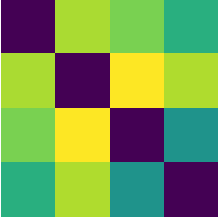

In [12]:
c_vectors = rsa.get_item_vectors(groups['C'].to_list(), model)
fig, ax = plt.subplots()
ax.matshow(sd.squareform(sd.pdist(a_vectors + c_vectors, 'correlation')))
ax.set_axis_off()
fig.savefig(fig_dir / 'rdm_ac.png', pad_inches=0)

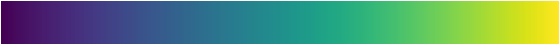

In [13]:
a = np.tile(np.arange(1024), (80, 1))
fig, ax = plt.subplots(figsize=(10, 1))
ax.matshow(a)
ax.set_axis_off()
fig.savefig(fig_dir / 'colorbar.png', pad_inches=0)

In [14]:
%load_ext watermark
%watermark -v -iv

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 8.3.0

matplotlib  : 3.5.1
numpy       : 1.22.3
mindstorm   : 0.9.0
pandas      : 1.4.3
scipy       : 1.8.0
bender_study: 0.1.0

